In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(filepath_or_buffer='../notebooks/DATA/penguins_size.csv')

In [5]:
df.dropna(inplace=True)

In [6]:
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
X = pd.get_dummies(df.drop(columns='species') , drop_first=True)
y = df['species']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100 , criterion='entropy', n_jobs=-1, max_features='sqrt', bootstrap=True , random_state=101)
 

In [45]:
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=101)

In [46]:
y_hat = forest.predict(X_test)

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report

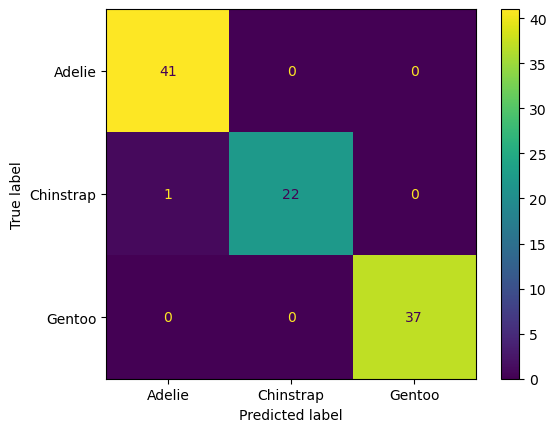

In [48]:
ConfusionMatrixDisplay(None).from_estimator(forest, X_test, y_test)

In [49]:
print(classification_report(y_pred=y_hat, y_true=y_test))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

